<a href="https://colab.research.google.com/github/ihsanalhafiz/annda/blob/main/Lab1a_ANNDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.1.1 Generation of linearly-separable data

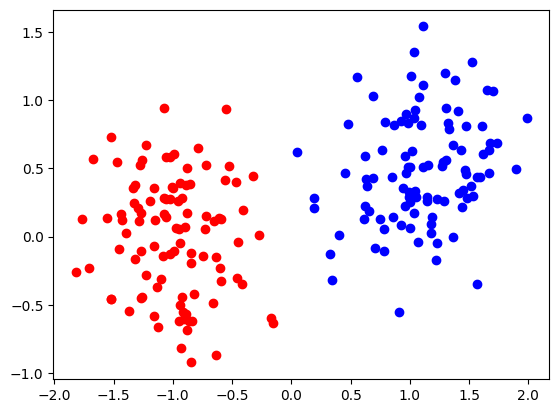

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# generate data for perceptron classification
n = 100
mA = np.array([1.0, 0.5])
sigmaA = 0.4
mB = np.array([-1.0, 0.0])
sigmaB = 0.4

classA = np.zeros((2, n))
classB = np.zeros((2, n))

classA[0, :] = np.random.randn(n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(n) * sigmaA + mA[1]
classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

# plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()


### 3.1.2 Classification with a single-layer perceptron and analysis

#### classifying the data using perceptron

[0.1 0.2]


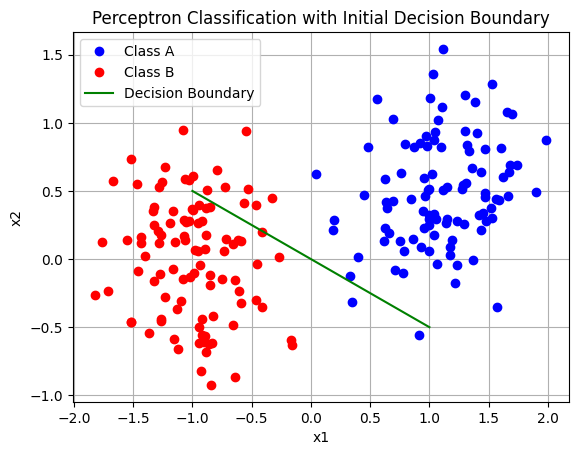

In [253]:

# make intial weights
w =  np.array([0.1, 0.2])
print(w)
eta = 0.1 # learning rate
w0 = 0 # bias

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g-', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Initial Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

[-0.2260361  -0.01257067]


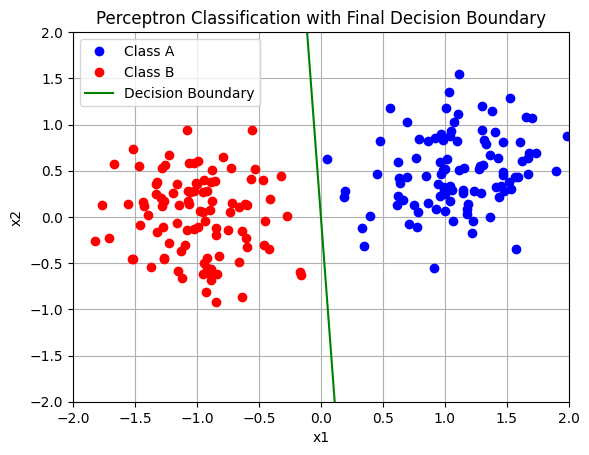

In [254]:
epochs = 50

for epoch in range(epochs):
    for i in range(n):
        y_quot = classA[0, i] * w[0] + classA[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 1:
            w = w - eta * np.array([classA[0, i], classA[1, i]])
        
        y_quot = classB[0, i] * w[0] + classB[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 0:
            w = w + eta * np.array([classB[0, i], classB[1, i]])

print(w)
# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g-', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Final Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


[-0.2260361  -0.01257067]
0


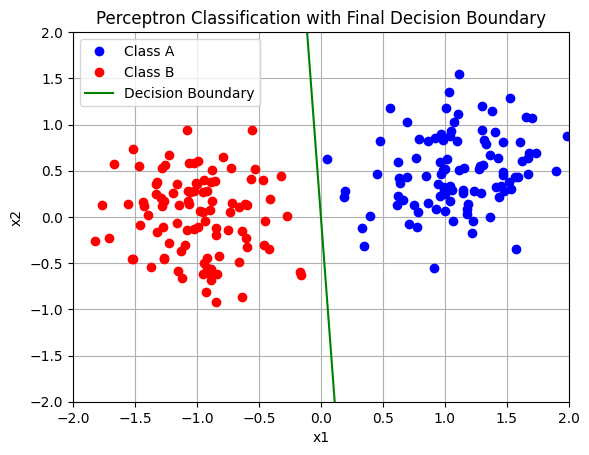

In [255]:
epochs = 50

for epoch in range(epochs):
    for i in range(n):
        x_matrix = np.array([classA[0, i], classA[1, i], 1])
        w_matrix = np.array([w[0], w[1], w0])
        w_t = np.transpose(w_matrix)
        y_quot = np.dot(w_t, x_matrix)
        y = 1 if y_quot > 0 else 0
        
        delta_w = eta * (0 - y) * x_matrix
        w_matrix = w_matrix + delta_w
        w = np.array([w_matrix[0], w_matrix[1]])
        
        x_matrix = np.array([classB[0, i], classB[1, i], 1])
        w_matrix = np.array([w[0], w[1], w0])
        w_t = np.transpose(w_matrix)
        y_quot = np.dot(w_t, x_matrix)
        y = 1 if y_quot > 0 else 0
        
        delta_w = eta * (1 - y) * x_matrix
        w_matrix = w_matrix + delta_w
        w = np.array([w_matrix[0], w_matrix[1]])

print(w)
print(w0)
# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g-', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Final Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

#### classifying the data using delta rule

[0.1 0.2]


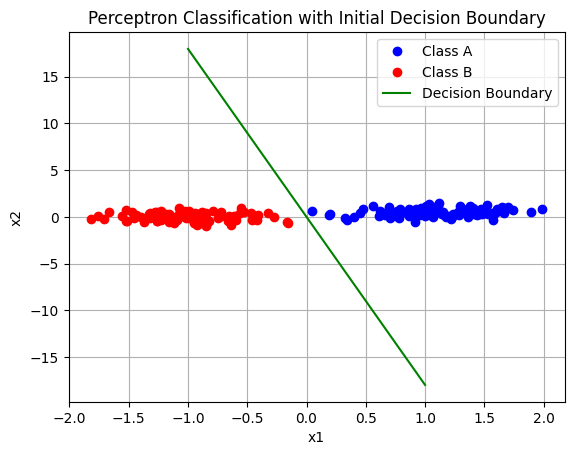

In [256]:

# make intial weights
w_deltarule =  np.array([0.1, 0.2])
print(w_deltarule)
eta_deltarule = 0.1 # learning rate
w0 = 0.0 # bias

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g-', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Initial Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

#### Compare sequential and batch learning for the delta rule

### 3.1.3 Classification of samples that are not linearly separable

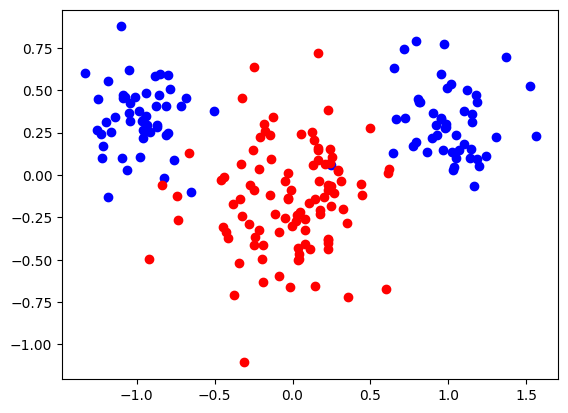

In [257]:
import numpy as np
import matplotlib.pyplot as plt

ndata = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Initialize classA and classB
classA = np.zeros((2, ndata))
classB = np.zeros((2, ndata))

# classA - First dimension: half shifted negatively, half shifted positively
classA[0, :] = np.concatenate((
    np.random.randn(round(0.5 * ndata)) * sigmaA - mA[0],
    np.random.randn(round(0.5 * ndata)) * sigmaA + mA[0]
))

# classA - Second dimension
classA[1, :] = np.random.randn(ndata) * sigmaA + mA[1]

# classB - First and second dimensions
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()
